MULTIPLE LINEAR REGRESSION - PART 3
(using House sales Prediction dataset)

1. Import libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

2. Loading, describing and preprocessing the Train and Test Dataset

In [10]:
train = pd.read_csv("dataset/house_sales_data/train_data.csv")
test = pd.read_csv("dataset/house_sales_data/test_data.csv")

In [11]:
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216


In [12]:
#dropping because it is just serial numbers
train = train.drop(["Unnamed: 0", "Id"], axis = 1)
test = test.drop(["Unnamed: 0", "Id"], axis = 1)

In [13]:
#splitting features and label of train data
train_data = train.values
Y = train_data[:, -1].reshape(train_data.shape[0], 1)
X = train_data[:, :-1]

In [14]:
#splitting features and label of test data
test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
X_test = test_data[:, :-1]

In [15]:
print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (1200, 69)
Shape of Y_train : (1200, 1)
Shape of X_test : (258, 69)
Shape of Y_test : (258, 1)


Pre-processing X -->(matrix multiplication of X and theta, we will need to add a column of 1s before all the features of X.)

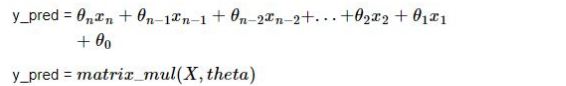

In [16]:
#vstack --> used to change the dimension of X
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

IMPLEMENTING MULTIPLE LINEAR REGRESSION
* In Multiple linear regression, our aim is to predict outcomes using several predicting features.
* To evaluate the accuracy of our predictions, we use cost/loss function, evaluating the difference between predicted and actual values, considering the combined effects of multiple predicting features.
* Here goal is to minimize this cost/loss function, indicating prediction error and finding optimal coefficient values for each predicting features.
* To achieve the minimum value we go for gradient descent algorithm.
* This algorithm iteratively adjusts parameters to decrease the cost/loss function.
* Through successive iterations, the algorithm converges towards a local minimum, optimizing our model.

3. Creating a linear regression model
(implementing cost function and gradient decent function)

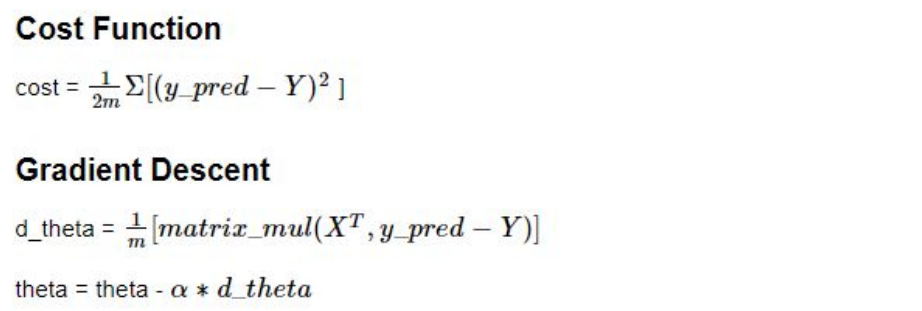

In [17]:
def model(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        # to print the cost for 10 times
        if(i%(iteration/10) == 0):
            print("Cost is :", cost)
    return theta, cost_list

4. Initialize the parameters and Train the model 

In [18]:
iteration = 10000
learning_rate = 0.000000005
theta, cost_list = model(X, Y, learning_rate = learning_rate, iteration = iteration)

Cost is : 72.37539364066856
Cost is : 0.027904168310316887
Cost is : 0.01725106537214416
Cost is : 0.016355272705548287
Cost is : 0.016158836087530742
Cost is : 0.016040958498450615
Cost is : 0.01594682732375345
Cost is : 0.015867896317230023
Cost is : 0.01580056801478539
Cost is : 0.0157423553064829


5. After training the model for 10000 iterations, we Plotting cost vs iteration graph 
(we can clearly see the minimizing value of cost over iterations, that's why we get goos prediction value) 

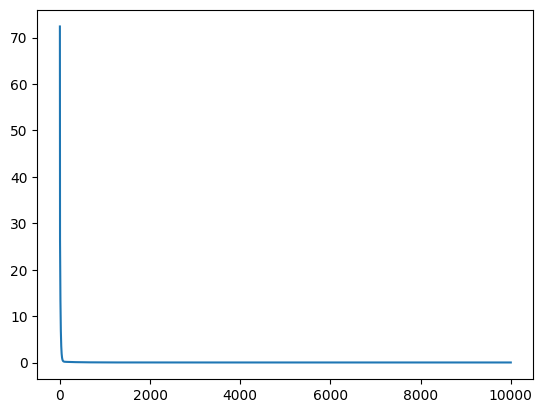

In [19]:
ranges = np.arange(0, iteration)
plt.plot(ranges, cost_list)
plt.show()

6. Calculating test accuracy (we calculate testing error, then find the test accuracy)

Here error is given by --> 
error = (1/m) * ∑|y_pred−Y|

In [20]:
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))

print("Test error is : ", error*100, "%")
print("Test Accuracy is : ", (1-error)*100, "%")

Test error is :  12.957658795431652 %
Test Accuracy is :  87.04234120456834 %
